In [58]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import nan

from scipy import stats

In [60]:
bills = pd.read_csv("Bills_of_material.csv", decimal=',')

In [61]:
bills

,Equipement type,SI unit value,Description,Model name,Link,Quantity,Mass (g),Type,Ecoinvent caracteristics (hypotheses),Categories plus simple,category,Link,Unnamed: 12
0,"Resistances 4,7K Ohm",4700,"Surface mount pads, Chip Resistor, 2-Leads, Bo...",RESC1005X04N,"https://circuithub,com/projects/melissa/tasha-...",18.0,0.00,"resistor production, surface-mounted","mass = 9,8mg",Basic electronic,Resistance,NaN,0.018
1,Resistances 33 Ohm,33,"Surface mount pads, Chip Resistor, 2-Leads, Bo...",RESC1005X04N,NaN,2.0,0.00,"resistor production, surface-mounted",NaN,Basic electronic,Resistance,NaN,0.002
2,"Resistances 2,7K Ohm",2700,"Surface mount pads, Chip Resistor, 2-Leads, Bo...",RESC1005X04N,NaN,2.0,0.00,"resistor production, surface-mounted",NaN,Basic electronic,Resistance,NaN,0.002
3,Resistances 22K Ohm,22000,"Surface mount pads, Chip Resistor, 2-Leads, Bo...",RESC1005X04N,NaN,10.0,0.00,"resistor production, surface-mounted",NaN,Basic electronic,Resistance,NaN,0.010
4,"Resistances 2,2K Ohm",2200,"Surface mount pads, Chip Resistor, 2-Leads, Bo...",RESC1005X04N,NaN,17.0,0.00,"resistor production, surface-mounted",NaN,Basic electronic,Resistance,NaN,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Screw,NaN,NaN,NaN,NaN,8.0,0.63,SCREW,NaN,Shell,NaN,NaN,5.000
74,PCB,NaN,NaN,NaN,NaN,1.0,36.57,PCB,NaN,Basic electronic,NaN,NaN,36.570
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
bills["Categories plus simple"].unique()

array(['Basic electronic ', 'MOTOR', 'Battery', 'Light emitting diode',
       'Sensors', 'Peripheral Connectors', 'Microcontroller', 'Shell ',
       nan], dtype=object)

In [63]:
new_bills = bills.set_index("Categories plus simple")
new_bills["Equipement type"][new_bills.index == 'Light emitting diode'].unique()

array(['LED red 56', 'LED RGB\xa0', 'LED red mounted on Thymio’s side',
       'LED blue mounted on Thymio’s side', 'LED Standard', 'LED red 57',
       'Diode Schottky Barrier Double Diode '], dtype=object)

In [64]:
#clean version

In [65]:
final_weigth = []
categories = []
tot_type = []

for cat in bills["Categories plus simple"].unique():
    
    arr = bills["Type"][(bills["Categories plus simple"] == cat)].unique()
    
    for typ in arr:

        arr_quant = bills["Quantity"][(bills["Categories plus simple"] == cat) & (bills["Type"] == typ)].values
        arr_mass = bills["Mass (g)"][(bills["Categories plus simple"] == cat) & (bills["Type"] == typ)].values

        arr_mass = [float(numeric_string) for numeric_string in arr_mass]
        
        final_weigth.append(sum(arr_quant*arr_mass))
        tot_type.append(typ)
        categories.append(cat)

In [66]:
answer = pd.DataFrame()
answer["type"] = tot_type
answer["mass"] = final_weigth
answer["block"] = categories

In [67]:
answer

,type,mass,block
0,"resistor production, surface-mounted",0.00,Basic electronic
1,"capacitor production, for surface-mounting",0.00,Basic electronic
2,ceramic tile,5.00,Basic electronic
3,"transistor production, surface-mounted",0.36,Basic electronic
4,IC LOGIC,0.60,Basic electronic
5,IC MEMORY,0.50,Basic electronic
6,brass production,0.05,Basic electronic
7,silica sand production,0.04,Basic electronic
8,PCB,36.57,Basic electronic
9,"electronic motor, vehicle",60.00,MOTOR


In [68]:
##### create tabular #####

In [69]:
simple_bills = bills[['Equipement type', 'Categories plus simple']]
simple_bills.rename(columns={'Categories plus simple': 'Block'}, inplace=True)
simple_bills.rename(columns={'Equipement type': 'Equipment type'}, inplace=True)

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_29326/2911530043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_bills.rename(columns={'Categories plus simple': 'Block'}, inplace=True)
/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_29326/2911530043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_bills.rename(columns={'Equipement type': 'Equipment type'}, inplace=True)


In [70]:
simple_bills.head()

,Equipment type,Block
0,"Resistances 4,7K Ohm",Basic electronic
1,Resistances 33 Ohm,Basic electronic
2,"Resistances 2,7K Ohm",Basic electronic
3,Resistances 22K Ohm,Basic electronic
4,"Resistances 2,2K Ohm",Basic electronic


In [71]:
# Group the dataframe by 'Block' and aggregate 'Equipment Type' into a list
simple_bills['Equipment type'] = simple_bills['Equipment type'].str.replace('/n', '')
tabular_df = simple_bills.groupby('Block')['Equipment type'].apply(list).reset_index()


# Define custom CSS styles for the tabular representation
styles = [
    {'selector': 'th', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'left')]},
    {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('margin', '10px 0')]},
    {'selector': 'th:first-child, td:first-child', 'props': [('padding-left', '15px')]},
    {'selector': 'th:last-child, td:last-child', 'props': [('padding-right', '15px')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#e0e0e0'), ('cursor', 'pointer')]}
]

# Apply the custom styles to the tabular dataframe
styled_df = tabular_df.style.set_table_styles(styles)

# Display the styled dataframe
styled_df


/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_29326/260127529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_bills['Equipment type'] = simple_bills['Equipment type'].str.replace('/n', '')


,Block,Equipment type
0,Basic electronic,"['Resistances 4,7K Ohm', 'Resistances 33 Ohm', 'Resistances 2,7K Ohm', 'Resistances 22K Ohm', 'Resistances 2,2K Ohm', 'Resistances 1,5K Ohm', 'Resistances 1K Ohm', 'Resistances 10K Ohm', 'Resistances 6,2 Ohm', 'Resistances 56 Ohm', 'Resistances 39 Ohm', 'Resistances 200 Ohm', 'Resistances 82 Ohm', 'Resistances 100 Ohm', 'Resistances 180 Ohm', 'Resistances 5,6K Ohm', 'Resistances 100K Ohm', 'Resistances 680K Ohm', 'Resistances 6,8K Ohm', 'Resistances 820 Ohm', 'Resistances 47K Ohm', 'Resistances 270K Ohm', 'Resistances 0 Ohm', 'Capacitor 100nf', 'Capacitor 10 uF', 'Capacitor 51 pF', 'Capacitor 4,7 nF', 'Capacitor 4,7 uF', 'Capacitor 10 uF X5R \n', 'Capacitor 18 pF', 'Capacitor 1 nF', 'Capacitor 1uF', 'Capacitor 1,5 nF', 'Capacitor 47 nF', 'SMD ferrite bead for EMI suppression ', 'General purpose transistor', 'Transistor MOSFET', 'Transistor MOSFET type 2 ', 'Operational Amplifier', '8-bit Shift Register with 3-state output registers', 'CMOS process low dropout linear regulator ', 'ULDO REGULATOR', 'Audio power amplifier', '1 x 6 pins connector', 'Surface Mount Quartz Crystal 8Mh\xa0', 'PCB']"
1,Battery,"['Multicell Battery 3,7V, 1500 mAh', 'Battery Charge Management Controller']"
2,Light emitting diode,"['LED red 56', 'LED RGB\xa0', 'LED red mounted on Thymio’s side', 'LED blue mounted on Thymio’s side', 'LED Standard', 'LED red 57', 'Diode Schottky Barrier Double Diode ']"
3,MOTOR,"['Motor, General Kind']"
4,Microcontroller,['General Purpose USB Microcontroller']
5,Peripheral Connectors,"['Micro SD connector', 'USB/Charger and over voltage detection device', 'WR-COM Micro USB']"
6,Sensors,"['Loudspeaker', 'Omnidirectional Back Electret Condenser', 'Thermistors\xa0', 'Switch\xa0', 'Accelerometer', 'Opto Interrupter \npart 1/2 ', 'Opto Interrupter \npart 2/2 ', 'Opto Interrupter type 2 Part 1/2', 'Opto Interrupter type 2 Part 2/2', 'IR receiver part 1/2', 'IR receiver part 2/2', 'ON/OFF BUTTON']"
7,Shell,"['Casing - ABS', 'Casing - Polycarbonate', 'Screw']"


In [72]:
####Comptage de masse #####

In [73]:
mass_capa_res = 1
np.sum(answer["mass"].values) + mass_capa_res

262.89000000000004

In [74]:
mass_ic_logic = answer[answer["type"] == 'IC LOGIC '].sum()
mass_ic_logic.mass

3.15

In [75]:
mass_ic_logic.mass*(207790.35/1000)

654.5396025

In [76]:
#### Fin comptage de masse ####

In [77]:
answer_new = answer.groupby(["category", "mass"])

KeyError: 'category'

In [78]:
answer_new  = answer.groupby(["category"]).sum()["mass"]

KeyError: 'category'

In [17]:
answer_new.head(20)

category
Basic electronic          43.12
Battery                   30.04
Light emitting diode       1.90
MOTOR                     60.00
Microcontroller            1.00
Peripheral Connectors      1.14
Sensors                    3.84
Shell                    120.04
Name: mass, dtype: float64

In [18]:
np.sum(answer["mass"].values)

261.08000000000004

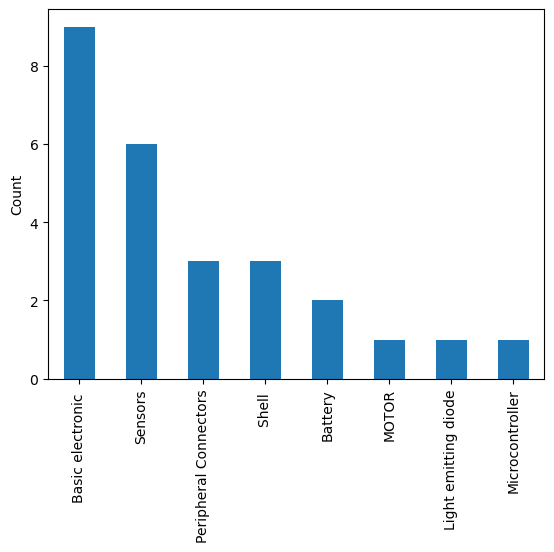

In [19]:
test = answer["category"].value_counts() 



test.plot(kind='bar')

plt.ylabel("Count")
plt.savefig('count_element_bills')
plt.show()


In [20]:
answer_new.sort_values()

category
Microcontroller            1.00
Peripheral Connectors      1.14
Light emitting diode       1.90
Sensors                    3.84
Battery                   30.04
Basic electronic          43.12
MOTOR                     60.00
Shell                    120.04
Name: mass, dtype: float64

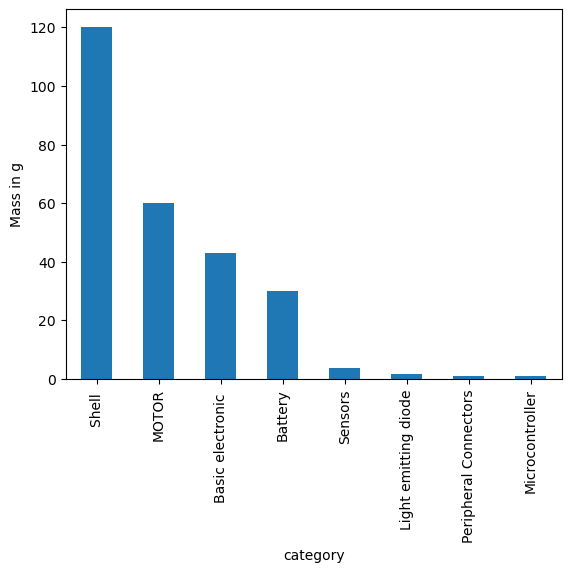

In [21]:
#Je veux pour chaque categories la masse totate sur un historgram

#cdystonia.sort_values(by='age', ascending=False)
answer_new = answer_new.sort_values(ascending = False)
answer_new.plot(kind='bar')
plt.ylabel("Mass in g")
plt.savefig('mass_in_each_cat.png')
plt.show()

In [21]:
all_ic_logic = answer[answer["type"] == "integrated circuit production, logic type"]
all_ic_memory  =  answer[answer["type"] == "integrated circuit production, memory"]

all_ic = pd.concat([all_ic_logic, all_ic_memory])

In [22]:
all_ic_memory

,type,mass,category


In [23]:
all_ic

,type,mass,category


In [24]:
#je veux connaitre la proportion de materiau dans chacun des gros composants

In [21]:
cat = answer["category"].unique()

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


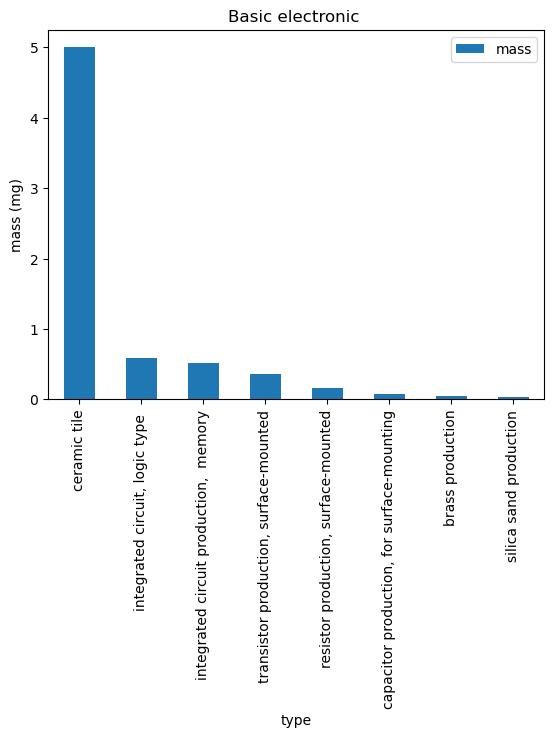

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


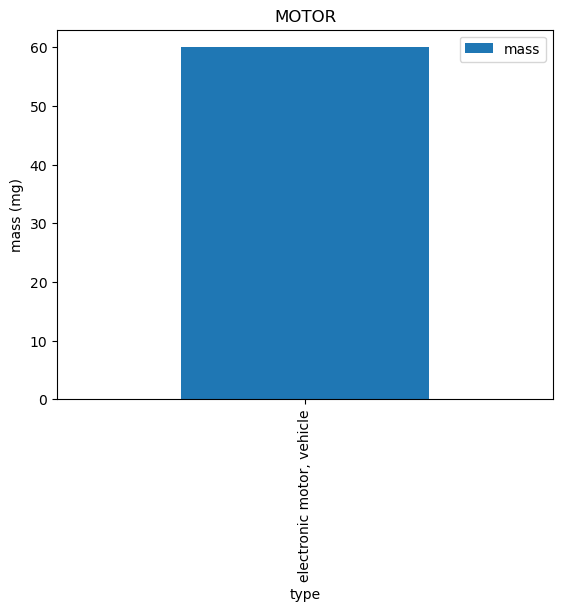

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


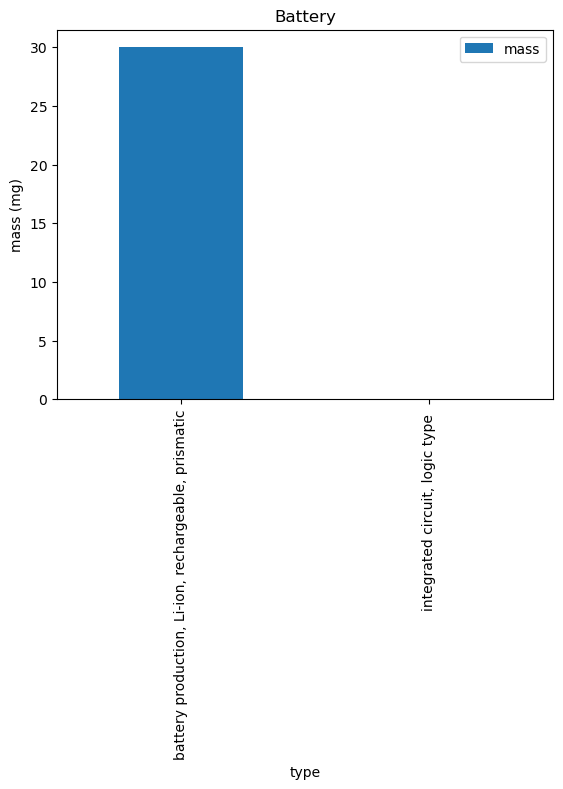

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


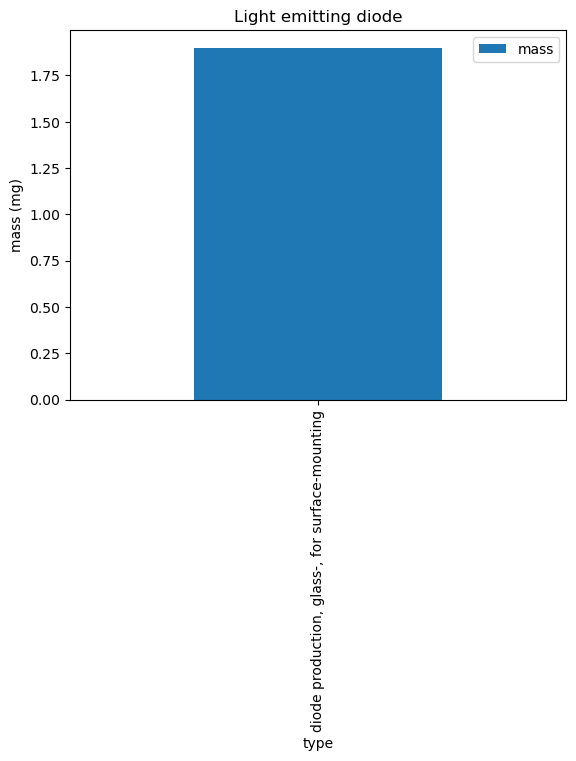

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


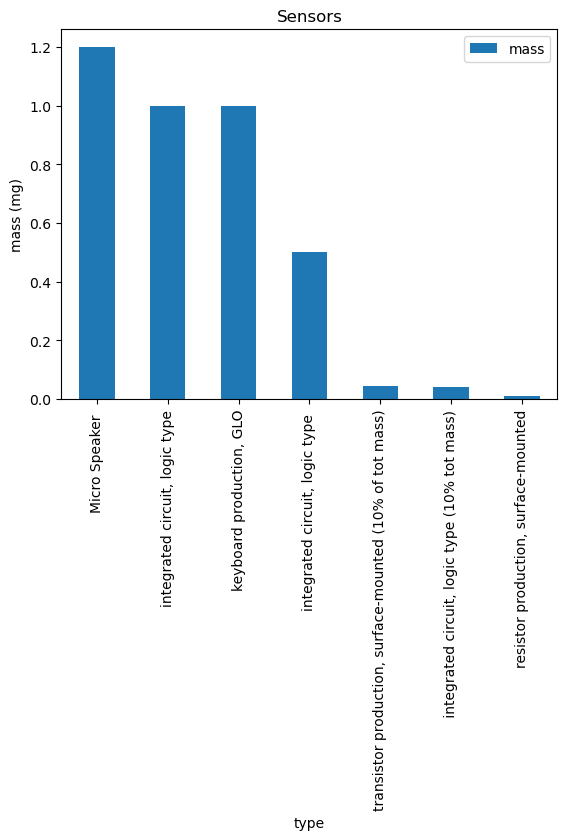

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


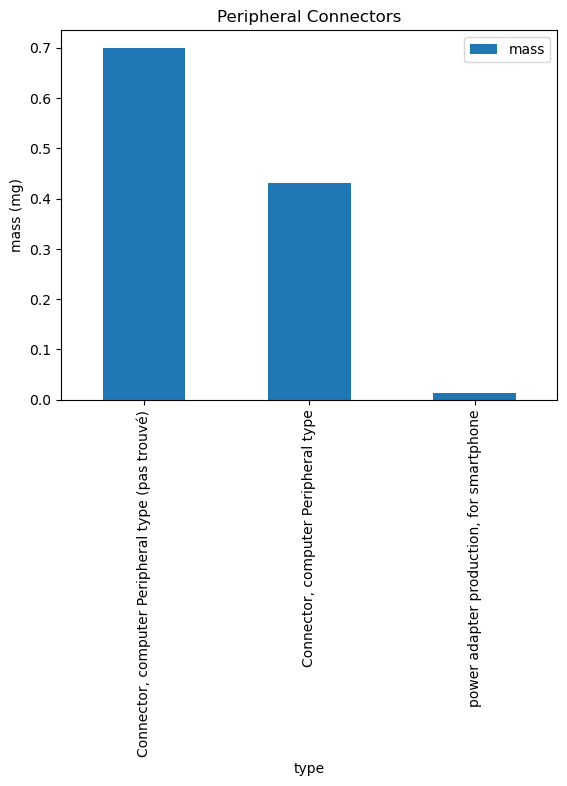

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


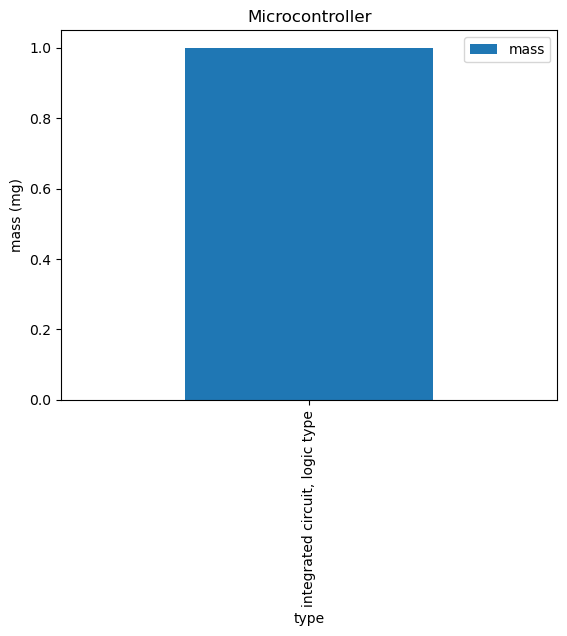

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_84111/2830805157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans = out.groupby(["type"]).sum()


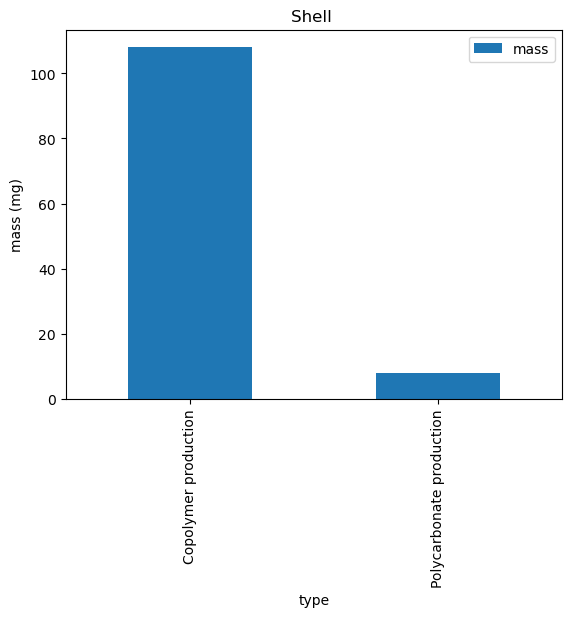

In [22]:
cat = answer["category"].unique()

for c in cat:
    out = answer[answer["category"] == c]
    #out = out.sort_values(by = "mass", ascending = False)
    ans = out.groupby(["type"]).sum()
    ans = ans.sort_values(by = "mass", ascending = False)
    
    ans.plot(kind='bar')
    plt.title(c)
    plt.ylabel("mass (mg)")
    plt.show()